In [1]:
from pathlib import Path

import pandas as pd

import save_life_in_ua as sliu

In [2]:
file_data = Path("../data/militarnyy_2022_tmp.xlsb")
### Uncomment the line below to download the latest data
# sliu.download_data(file_data)

In [3]:
df_in, df_out = sliu.read_and_preprocess_data(file_data)

Latest date in the data: max_date_in=Timestamp('2022-04-25 00:00:00'), max_date_out=Timestamp('2022-04-21 00:00:00')


### Largest donations

In [4]:
pd.set_option("max_colwidth", 200)
sliu.get_top_N_donations(df_in)

,date,"amount, millions UAH",source
0,2022-04-19,88.936589,"ДП ДГЗП ""Спецтехноекспорт"""
1,2022-04-19,88.215235,"ДП ДГЗП ""Спецтехноекспорт"""
2,2022-03-01,85.467079,Недоговірні платежі (Монобанк)
3,2022-03-02,66.897387,"Благодійна допомога війсковослужбовцям ТОВ ""ФК ""ЄДИНИЙ ПРОСТІР"""
4,2022-02-28,54.149974,Недоговірні платежі (Монобанк) Приняті платежі згідно реєстру №__povernuczhivum_v.csv
5,2022-03-02,40.493605,Приняті платежі згідно реєстру №314106332_20220302_povernuczhivum_20220301v1.csv (Монобанк)
6,2022-02-28,27.819606,Недоговірні платежі (Монобанк) Приняті платежі згідно реєстру №__povernuczhivum_v.csv
7,2022-02-25,24.173089,Недоговірні платежі (Монобанк)
8,2022-02-28,21.215368,Недоговірні платежі (Монобанк) Приняті платежі згідно реєстру №__povernuczhivum_v.csv
9,2022-03-07,20.101388,"ТОВ ""ФК ""ЄДИНИЙ ПРОСТІР"""


### Plot daily sums

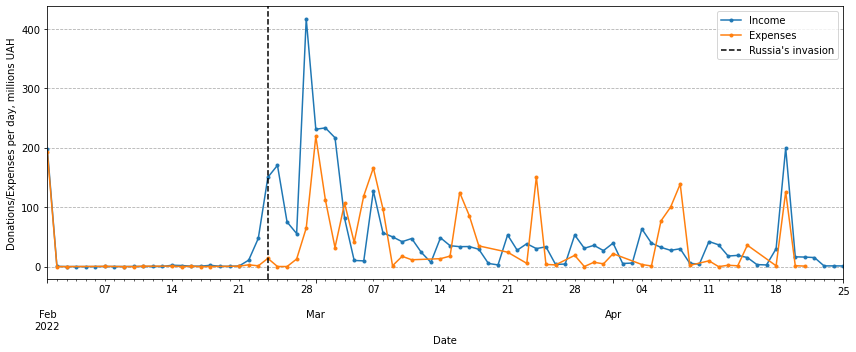

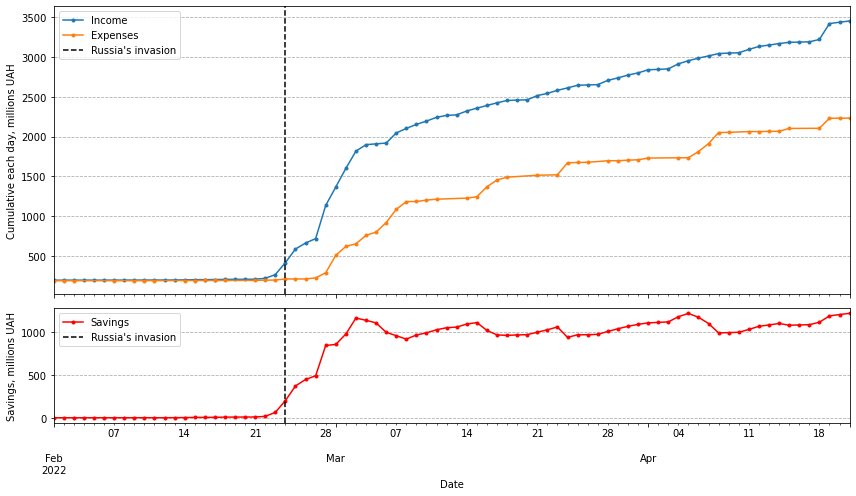

In [5]:
# aggregate and transform values into millions
df_in_date = sliu.get_daily_total(df_in)
df_out_date = sliu.get_daily_total(df_out)

# %%
# plot daily sums
sliu.plot_daily_inout(df_in_date, df_out_date, date_start="2022-02-01")
sliu.plot_cum_daily_inout(df_in_date, df_out_date, date_start="2022-02-01")

### Plot word counts in the expenses

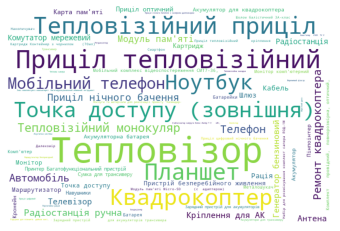

In [6]:
# plot word counts in the
s_final = sliu.process_type_of_expenses(df_out["type"])

sliu.plot_word_cloud_expenses(s_final)